# Part 3. Tensorflow tutorial - Image segmentation

### Goal of this tutorial:
###     Build and train a model which segments aorta in CT images

## (1) Labelling train images

In [1]:
# Create ground-truth mask image on Slicer software

In [2]:

import nibabel as nb 
import numpy as np

import matplotlib.pyplot as plt
import os
import pandas as pd 
import cv2 

#from keras.models import Sequential
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import tensorflow as tf
%matplotlib inline

In [3]:

for dirname, _, filenames in os.walk('./aorta-ct-scans'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
root, dirs, files

root : dir과 files가 있는 path
dirs : root 아래에 있는 폴더들
files : root 아래에 있는 파일들
'''

./aorta-ct-scans\aorta_metadata.csv
./aorta-ct-scans\CT (51).nii
./aorta-ct-scans\ct_segmentation_result.csv
./aorta-ct-scans\Segmentation (51).nii
./aorta-ct-scans\Untitled.ipynb
./aorta-ct-scans\.ipynb_checkpoints\Untitled-checkpoint.ipynb
./aorta-ct-scans\local_ct_data\0000\CT0.nii
./aorta-ct-scans\local_ct_data\0000\PET.nii
./aorta-ct-scans\local_ct_data\0000\Segmentation.nii
./aorta-ct-scans\local_ct_data\0001\CT1.nii
./aorta-ct-scans\local_ct_data\0001\Segmentation.nii
./aorta-ct-scans\local_ct_data\0002\CT2.nii
./aorta-ct-scans\local_ct_data\0002\Segmentation.nii
./aorta-ct-scans\local_ct_data\0003\CT3.nii
./aorta-ct-scans\local_ct_data\0003\Segmentation.nii
./aorta-ct-scans\local_ct_data\0004\CT4.nii
./aorta-ct-scans\local_ct_data\0004\Segmentation.nii
./aorta-ct-scans\local_ct_data\0005\CT5.nii
./aorta-ct-scans\local_ct_data\0005\Segmentation.nii
./aorta-ct-scans\local_ct_data\0006\CT6.nii
./aorta-ct-scans\local_ct_data\0006\Segmentation.nii
./aorta-ct-scans\local_ct_data\0007

./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10052.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10053.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10054.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10055.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10056.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10057.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10058.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10059.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10060.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10061.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10062.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10063.dcm
./aorta-ct-scans\local_ct_data_not_labeled\not_labeled\0258923C\CT\10064.dcm

'\nroot, dirs, files\n\nroot : dir과 files가 있는 path\ndirs : root 아래에 있는 폴더들\nfiles : root 아래에 있는 파일들\n'

In [36]:
def read_ct(path):
    image=nb.load(path)
    array=image.get_fdata()
    array=np.rot90(np.array(array,dtype=np.float32))
    return array



In [39]:

img_image=nb.load(CT_scans[10])
array_i=img_image.get_fdata()
array_i=np.rot90(np.array(array_i,dtype=np.float32))

ImageFileError: Cannot work out file type of "C:\jupyter project\aorta-ct-scans\train\local_ct_total_data\input_010.nii.npy"

In [31]:
mask_image=nb.load(Mask_scan[10])
array_m=mask_image.get_fdata()
array_m=np.rot90(np.array(array_m,dtype=np.float32))

FileNotFoundError: No such file or no access: './aorta-ct-scans/train/local_segmentation_total_data/Segmentation (19).nii'

In [32]:
data=pd.read_csv("./aorta-ct-scans/path_list.csv")


In [33]:
data

,Unnamed: 0,data_file,segmentation_file
0,0,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
1,1,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
2,2,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
3,3,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
4,4,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
5,5,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
6,6,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
7,7,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
8,8,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...
9,9,C:\jupyter project\aorta-ct-scans\train\local_...,C:\jupyter project\aorta-ct-scans\train\local_...


In [34]:
CT_scans=data["data_file"]
Mask_scan=data["segmentation_file"]


In [35]:

window_set = {'lung' : (-750-1500/2, -750+1500/2), 'abdomen' : (50-250/2, 50+250/2),
              'mediastinum' : (45-450/2, 45+450/2), 'bone' : (500-2000/2, 500+2000/2),
              'brain' : (40-70/2, 40+70/2), 'pelvis' : (45-300/2, 45+300/2)}

In [23]:
#img=read_ct(CT_scans[10])
img=array_i
#mask=read_ct(Mask_scan[10])
mask=array_m
plt.figure(figsize=(8, 8))
plt.imshow(img[...,200], cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

plt.figure(figsize=(8, 8))
plt.imshow(mask[...,200],cmap='gray')
print(img.shape)
print(mask.shape)

NameError: name 'array_i' is not defined

In [24]:
CT = []
Mask = []
img_size = 512


for case in range(len(data)): #Concat all cases to list
    ct = read_ct(CT_scans[case])
    mask = read_ct(Mask_scan[case])
    
    for imgsize in range(ct.shape[0]):        
        ct_img = cv2.resize(ct[imgsize], dsize = (img_size, img_size),interpolation = cv2.INTER_AREA).astype('uint8')
        mask_img = cv2.resize(mask[imgsize],dsize=(img_size, img_size),interpolation = cv2.INTER_AREA).astype('uint8')
        CT.append(ct_img[np.newaxis,...])
        Mask.append(mask_img[np.newaxis,...])

FileNotFoundError: No such file or no access: './aorta-ct-scans/train/local_ct_total_data/CT (1).nii'

In [25]:
CT=np.array(CT)
Mask=np.array(Mask)
mins = CT.min(axis=(1,2,3), keepdims=True)
maxs = CT.max(axis=(1,2,3), keepdims=True)
norm_data = (CT-mins)/(maxs-mins)
print(CT.shape)
print(Mask.shape)
#CT=CT.swapaxes(1,3)

AxisError: axis 1 is out of bounds for array of dimension 1

In [33]:
window_set = {'lung' : (-750-1500/2, -750+1500/2), 'abdomen' : (50-250/2, 50+250/2),
              'mediastinum' : (45-450/2, 45+450/2), 'bone' : (500-2000/2, 500+2000/2),
              'brain' : (40-70/2, 40+70/2), 'pelvis' : (45-300/2, 45+300/2)}

class IndexTracker:
    def __init__(self, ax, X, window='mediastinum'):
        self.ax = ax
        self.X = X
        #rows, self.cols, slices = X.shape
        self.rows, cols, slices = X.shape  #
        #height, width, channel = X.shape
        self.window = window_set[window]
        self.ind = 0 # set initial state
        
        #M = cv2.getRotationMatrix2D((width/2.0, height/2.0),90,1) #회전
        #self.X = cv2.warpAffine(self.X,M,(width,height)) #회전 다만 화면이 잘리고 늘려짐..
        #self.X = cv2.resize(self.X,(width,height), fx=10, fy=10)
        #self.X = cv2.resize(self.X, dsize=(width,height), interpolation=cv2.INTER_AREA)
        
        self.im = ax.imshow(self.X[self.ind,:,:], cmap='gray',vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

        #self.X[:,:,self.ind]
            
        
        self.update()
        
    def on_scroll(self, event):
        if event.button == 'up':
            # self.ind = (self.ind - 5) % self.slices
            self.ind = (self.ind - 1) % self.rows#
        else:
            # self.ind = (self.ind + 5) % self.slices
            self.ind = (self.ind + 1) % self.rows#
            
        self.update()
        
    def update(self):
        self.im.set_data(self.X[self.ind,:,:])#
        self.ax.set_ylabel('row %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
def plot3d(image, window='mediastinum', size=(8,8)):
    fig, ax = plt.subplots(1, 1, gridspec_kw=dict(top=1, bottom=0, left=0.08, right=0.96), figsize=size)
    tracker = IndexTracker(ax, image, window=window)
    fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
    plt.show()
    return tracker

In [34]:
# stack 2d images to create 3d volume

vol_array = np.array([img_image.get_fdata() for file in CT_scans])
vol_array = np.moveaxis(vol_array, 0, -1) #축을 새위치로 이동(0,-1)

print('Volume shape = {0}'.format(vol_array.shape))

Volume shape = (512, 512, 299, 51)


In [35]:
vol_array_reduction = np.squeeze(vol_array)

In [36]:
vol_array_reduction.shape

(512, 512, 299, 51)

In [37]:
vol_array[...,0].shape

(512, 512, 299)

In [38]:

%matplotlib qt

In [39]:
plot3d(vol_array[...,0].T, window='mediastinum', size=(12,12))

In [41]:

class IndexTracker_m:
    def __init__(self, ax, X):
        self.ax = ax
        self.X = X
        #rows, self.cols, slices = X.shape
        self.rows, cols, slices = X.shape  #
        #height, width, channel = X.shape
        
        self.ind = 0 # set initial state
        
        #M = cv2.getRotationMatrix2D((width/2.0, height/2.0),90,1) #회전
        #self.X = cv2.warpAffine(self.X,M,(width,height)) #회전 다만 화면이 잘리고 늘려짐..
        #self.X = cv2.resize(self.X,(width,height), fx=10, fy=10)
        #self.X = cv2.resize(self.X, dsize=(width,height), interpolation=cv2.INTER_AREA)
        
        self.im = ax.imshow(self.X[self.ind,:,:],cmap='gray')

        #self.X[:,:,self.ind]
            
        
        self.update()
        
    def on_scroll(self, event):
        if event.button == 'up':
            #self.ind = (self.ind - 5) % self.slices
            self.ind = (self.ind - 1) % self.rows#
        else:
            #self.ind = (self.ind + 5) % self.slices
            self.ind = (self.ind + 1) % self.rows#
            
        self.update()
        
    def update(self):
        self.im.set_data(self.X[self.ind,:,:])#
        self.ax.set_ylabel('row %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
def plot3d_m(image, size=(8,8)):
    fig, ax = plt.subplots(1, 1, gridspec_kw=dict(top=1, bottom=0, left=0.08, right=0.96), figsize=size)
    tracker = IndexTracker_m(ax, image)
    fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
    plt.show()
    return tracker

In [24]:
# stack 2d images to create 3d volume

vol_array_m = np.array([mask_image.get_fdata() for file in CT_scans])
vol_array_m = np.moveaxis(vol_array_m, 0, -1) #축을 새위치로 이동(0,-1)

print('Volume shape = {0}'.format(vol_array_m.shape))

Volume shape = (512, 512, 299, 51)


In [42]:
vol_array_m[...,0].shape

(512, 512, 299)

In [43]:

%matplotlib qt

In [44]:
plot3d_m(vol_array_m[...,0].T, size=(12,12))

## (2) Define train/validation set

In [11]:
class CT_dataset(keras.utils.Sequence):
    def __init__(self, CT,Mask):
        self.ct_scans =CT
        self.mask_scan = Mask

    def __len__(self):
        return len(self.ct_scans)

    def __getitem__(self, idx):
        ct=self.ct_scans[idx]
        masks=self.mask_scan[idx]
        return ct,masks


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(norm_data,Mask,test_size=0.2,random_state=42)

In [13]:
##임의수정 x_train,x_test,y_train,y_test
x_train=x_train.swapaxes(1,3)
y_train=y_train.swapaxes(1,3)
x_test=x_test.swapaxes(1,3)
y_test=y_test.swapaxes(1,3)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20889, 512, 512, 1)
(20889, 512, 512, 1)
(5223, 512, 512, 1)
(5223, 512, 512, 1)


In [15]:
train_dataset=CT_dataset(x_train,y_train)
test_dataset=CT_dataset(x_test,y_test)

In [16]:
import numpy as np
import math
from tensorflow.keras.utils import Sequence

class Dataloader(Sequence):

    def __init__(self, x_set, y_set, batch_size, shuffle=False):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.shuffle=shuffle
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

		# batch 단위로 직접 묶어줘야 함
    def __getitem__(self, idx):
				# sampler의 역할(index를 batch_size만큼 sampling해줌)
        indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]

        batch_x = [self.x[i] for i in indices]
        batch_y = [self.y[i] for i in indices]

        return np.array(batch_x), np.array(batch_y)

    # epoch이 끝날때마다 실행
    def on_epoch_end(self):
        self.indices = np.arange(len(self.x))
        if self.shuffle == True:
            np.random.shuffle(self.indices)
            

train_dl = Dataloader(x_train,y_train, 4, shuffle=True)
valid_dl = Dataloader(x_test,y_test, 1, shuffle=False)


(20889, 1, 512, 512)
(20889, 1, 512, 512)


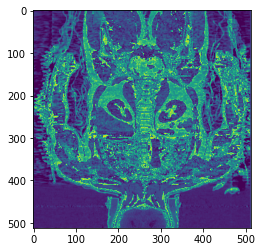

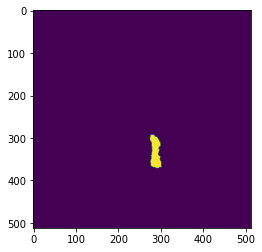

In [18]:
image,label=train_dataset[:]
image=image.swapaxes(1,3)
label=label.swapaxes(1,3)
print(image.shape)
print(label.shape)
plt.imshow(image[20000].squeeze(0).T) 
plt.figure()
plt.imshow(label[20000].squeeze(0).T)

# #Advanced visualization

In [19]:

class IndexTracker:
    def __init__(self, ax, X, window='mediastinum'):
        self.ax = ax
        self.X = X
        #rows, self.cols, slices = X.shape
        rows, cols, self.slices = X.shape  #
        height, width, channel = X.shape
        self.window = window_set[window]
        self.ind = 0 # set initial state
        
        M = cv2.getRotationMatrix2D((width/2.0, height/2.0),90,1) #회전
        self.X = cv2.warpAffine(self.X,M,(width,height)) #회전 다만 화면이 잘리고 늘려짐..
        self.X = cv2.resize(self.X,(width,height), fx=10, fy=10)
        #self.X = cv2.resize(self.X, dsize=(width,height), interpolation=cv2.INTER_AREA)
        
        self.im = ax.imshow(self.X[:,:,self.ind], cmap='gray', vmin=self.window[0], vmax=self.window[1])

        #self.X[:,:,self.ind]
            
        
        self.update()
        
    def on_scroll(self, event):
        if event.button == 'up':
            # self.ind = (self.ind - 5) % self.slices
            self.ind = (self.ind - 5) % self.slices#
        else:
            # self.ind = (self.ind + 5) % self.slices
            self.ind = (self.ind + 5) % self.slices#
            
        self.update()
        
    def update(self):
        self.im.set_data(self.X[:,:,self.ind])#
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


In [20]:
        
def plot3d(image, window='mediastinum', size=(8,8)):
    fig, ax = plt.subplots(1, 1, gridspec_kw=dict(top=1, bottom=0, left=0.08, right=0.96), figsize=size)
    tracker = IndexTracker(ax, image, window=window)
    fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
    plt.show()
    return tracker

In [21]:
import glob
nii_directory = './aorta-ct-scans/local_ct_total_data'

nii_filelist = [os.path.join(nii_directory, file) for file in os.listdir(nii_directory) if file.endswith('nii')]

#print('number of slices : {0}'.format(len(nii_filelist)))
#test = nib.read_file(nii_filelist[0])


nii_file = glob.glob(os.path.join(nii_directory, '*.nii'))
nii_file = nii_file[0]

nii1 = nb.load(nii_file)

In [24]:
# stack 2d images to create 3d volume

#vol_array = np.array([pydicom.read_file(file).pixel_array for file in CT_scans])
nii1.dataobj[...,0]
vol_array = np.array([nii1.dataobj[...,0] for file in CT_scans])
vol_array = np.moveaxis(vol_array, -1, 0) #축을 새위치로 이동(0,-1)

print('Volume shape = {0}'.format(vol_array.shape))

Volume shape = (512, 51, 512)


In [27]:
nii1 = nii1.swapaxes(1,2)

AttributeError: 'Nifti1Image' object has no attribute 'swapaxes'

In [ ]:
advance 시각화에서  swap이 안되는 문제
안하고 모델학습 시켜도 되는데 그러면 결과가 무의미해짐

In [186]:
nii1.shape

(299, 512, 512)

In [187]:
# Visualize image in new window

%matplotlib qt

In [192]:
plot3d(nii1[1], window='mediastinum', size=(15,15))

ValueError: not enough values to unpack (expected 3, got 2)

## (3) Build and train a model

### Method 1 : U-Net

In [62]:
# U-Net : https://arxiv.org/abs/1505.04597
# input shape = output shape : (batch_size, 512, 512, 1)

def unet():
    # encoding + decoding layer with skip connection
    # Fully convolutional network without dense layer 
    # FCN : https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf
    
    # tf.keras.layers.Conv2D
    # tf.keras.layers.MaxPool2D
    # tf.keras.layers.BatchNormalization
    # tf.keras.layers.ReLu
    # tf.keras.layers.Conv2DTranspose or tf.keras.layers.UpSampling2D + tf.keras.layers.Conv2D
    # tf.concat
    # Sigmoid activation at last layer
    
    ...
    ...
    
    return model

In [29]:
from sklearn.model_selection import train_test_split,StratifiedKFold


from tensorflow.keras.layers import Dense, Input, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization,Add,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import LeakyReLU, ReLU, Conv2D, MaxPooling2D, BatchNormalization, Conv2DTranspose, UpSampling2D, concatenate
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K

In [30]:
def UNet(pretrained_weights = None,input_size = (512,512,1)):
    inp = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inp)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inp, outputs=[conv10])

    return model

In [31]:
model = UNet()
model.summary()
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

C:\ProgramData\Anaconda3\envs\saynot\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [119]:
history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs = 10)

Epoch 1/10
653/653 [==============================] - 32s 46ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 9.7211e-04 - val_accuracy: 0.9998
Epoch 2/10
653/653 [==============================] - 30s 46ms/step - loss: 7.5018e-04 - accuracy: 0.9998 - val_loss: 7.4709e-04 - val_accuracy: 0.9998
Epoch 3/10
653/653 [==============================] - 30s 46ms/step - loss: 6.7570e-04 - accuracy: 0.9998 - val_loss: 7.6648e-04 - val_accuracy: 0.9998
Epoch 4/10
653/653 [==============================] - 30s 47ms/step - loss: 6.1988e-04 - accuracy: 0.9998 - val_loss: 5.8405e-04 - val_accuracy: 0.9998
Epoch 5/10
653/653 [==============================] - 30s 46ms/step - loss: 5.5157e-04 - accuracy: 0.9998 - val_loss: 5.4858e-04 - val_accuracy: 0.9998
Epoch 6/10
653/653 [==============================] - 30s 46ms/step - loss: 4.6399e-04 - accuracy: 0.9998 - val_loss: 4.8089e-04 - val_accuracy: 0.9998
Epoch 7/10
653/653 [==============================] - 30s 47ms/step - loss: 4.0170e-04 - acc

In [121]:
model.evaluate(x_test, y_test)

164/164 [==============================] - 2s 13ms/step - loss: 3.4905e-04 - accuracy: 0.9999


[0.00034905425854958594, 0.9998689293861389]

In [122]:
from keras.models import model_from_json
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [59]:
##임의수정 x_train,x_test,y_train,y_test
x_train=x_train.swapaxes(1,3)
y_train=y_train.swapaxes(1,3)
x_test=x_test.swapaxes(1,3)
y_test=y_test.swapaxes(1,3)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20889, 64, 64, 1)
(20889, 64, 64, 1)
(5223, 64, 64, 1)
(5223, 64, 64, 1)


In [67]:
training_pred = model.predict(x_train)
testing_pred = model.predict(x_test)

In [68]:
def prediction(X, y, pred, k=None):
    if k  == 'None':
        k = np.random.randint(0, len(X))

    has_mask = y[k].max() > 0

    figure, j = plt.subplots(1, 3, figsize=(20, 20))
    j[0].imshow(X[k, ..., 0])
    if has_mask:
        j[0].contour(y[i].squeeze())
    k[1].imshow(y[i].squeeze())
    k[2].imshow(pred[i].squeeze())
    if has_mask:
        k[2].contour(preds[i].squeeze())

TypeError: Invalid shape (1, 20889, 64, 64) for image data

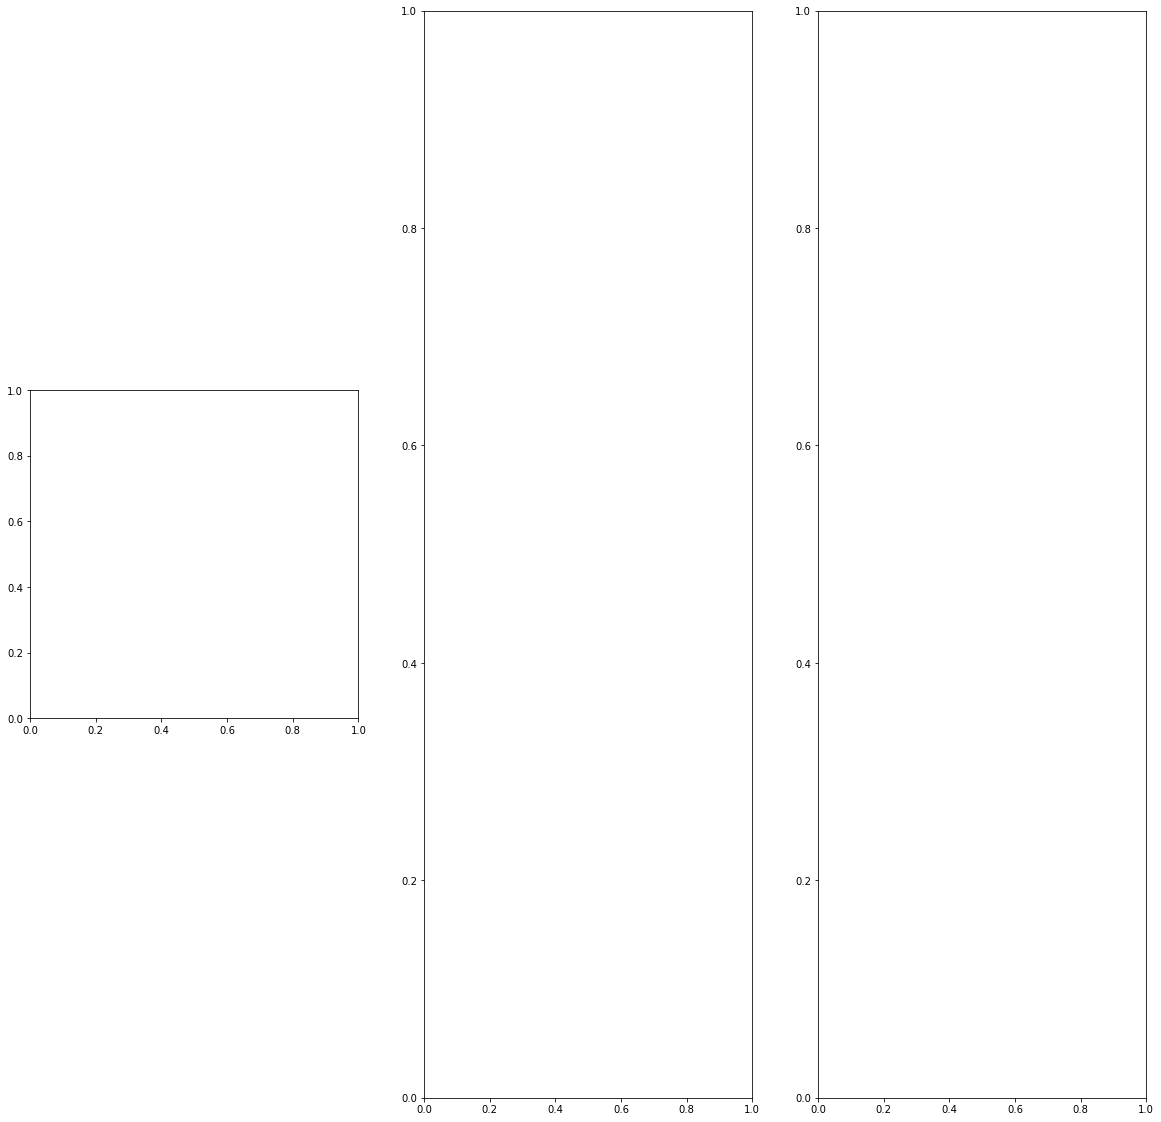

In [82]:
prediction(x_train, y_train,training_pred)

In [48]:
xhat = x_test[0:1]
yhat = model.predict(xhat)

#print(yhat)

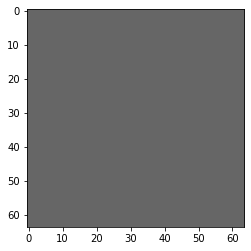

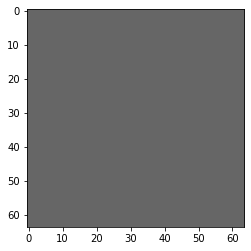

In [61]:
plt.imshow(xhat[0,...], cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])
plt.figure()
plt.imshow(yhat[0,...], cmap='gray', vmin=window_set['mediastinum'][0], vmax=window_set['mediastinum'][1])

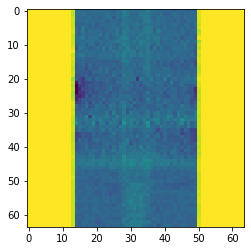

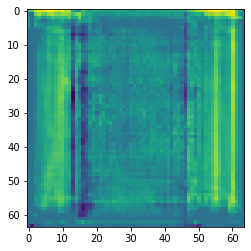

In [55]:
plt.imshow(xhat[0,...])
plt.figure()
plt.imshow(yhat[0,...])
#plt.imshow(yhat.squeeze(0))

### Method 2 : 3D U-Net

In [ ]:
# 3D Unet : https://arxiv.org/abs/1606.06650
# input shape : (batch_size, 512, 512, height, 1)

def unet_3D():
    
    # tf.keras.layers.Conv3D
    # tf.keras.layers.MaxPool3D
    # tf.keras.layers.BatchNormalization
    # tf.keras.layers.ReLu
    # tf.keras.layers.Conv3DTranspose or tf.keras.layers.UpSampling3D + tf.keras.layers.Conv3D
    # tf.concat
    # Sigmoid activation at last layer
    
    ...
    ...
    
    return model

In [ ]:
# define a optimizer/metrics and compile the model

model.compile(...)


# print summary of this model
model.summary()

In [ ]:
# Start training

model_history = model.fit(...)

## (4) Plot loss and metrics

In [ ]:
model_history.epoch
model_history.history





## (5) Predict on test set images

In [ ]:
model.predict()

## (6) Saving & loading the trained model

In [ ]:
model.save(...)

## (7) Debugging model/dataset